In [45]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [46]:
!pwd

/cygdrive/c/Users/harol/Software_Projects/Test/Python/test-ai-python/hugging-face


In [1]:
import os
from pathlib import Path

dirname = "aclimdb/train/neg"
# filenames = Path.glob(dirname, "*.txt")
filenames = os.listdir(dirname)[:100]
filenames
# for filename in filenames:
#     with open(f"{dirname}/{filename}") as f:
#         line = f.readline()

#         print(f"--- {line}")

['0_3.txt',
 '10000_4.txt',
 '10001_4.txt',
 '10002_1.txt',
 '10003_1.txt',
 '10004_3.txt',
 '10005_3.txt',
 '10006_4.txt',
 '10007_1.txt',
 '10008_2.txt',
 '10009_1.txt',
 '1000_4.txt',
 '10010_3.txt',
 '10011_3.txt',
 '10012_1.txt',
 '10013_1.txt',
 '10014_2.txt',
 '10015_2.txt',
 '10016_4.txt',
 '10017_4.txt',
 '10018_3.txt',
 '10019_3.txt',
 '1001_4.txt',
 '10020_3.txt',
 '10021_2.txt',
 '10022_4.txt',
 '10023_1.txt',
 '10024_3.txt',
 '10025_1.txt',
 '10026_2.txt',
 '10027_1.txt',
 '10028_2.txt',
 '10029_1.txt',
 '1002_3.txt',
 '10030_1.txt',
 '10031_2.txt',
 '10032_4.txt',
 '10033_1.txt',
 '10034_1.txt',
 '10035_1.txt',
 '10036_1.txt',
 '10037_1.txt',
 '10038_3.txt',
 '10039_1.txt',
 '1003_3.txt',
 '10040_2.txt',
 '10041_1.txt',
 '10042_1.txt',
 '10043_1.txt',
 '10044_1.txt',
 '10045_1.txt',
 '10046_1.txt',
 '10047_1.txt',
 '10048_4.txt',
 '10049_1.txt',
 '1004_4.txt',
 '10050_2.txt',
 '10051_4.txt',
 '10052_4.txt',
 '10053_4.txt',
 '10054_1.txt',
 '10055_3.txt',
 '10056_2.txt',
 

In [4]:
from pathlib import Path

model_name = "distilbert-base-uncased"

def read_imdb_split(split_dir):
  split_dir = Path(split_dir)
  texts = []
  labels = []
  for label_dir in ["pos", "neg"]:
    for text_file in os.listdir(split_dir/label_dir):
        print(f"Processing {text_file} - {text_file.split('.')[-1]}")
        if text_file.split(".")[-1] == "txt":
          with open(split_dir/label_dir/text_file, "rb") as f:
              line = str(f.readline())
              texts.append(line)
              labels.append(0 if label_dir == "neg" else 1)

  return texts, labels

In [3]:
# import requests

# resp = requests.get("http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz")
# open("aclImdb_v1.tar.gz", "wb").write(resp.content)

!curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

!tar xzf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 80.2M    0  1200    0     0   1719      0 13:35:38 --:--:-- 13:35:38  1721
  0 80.2M    0  245k    0     0   155k      0  0:08:49  0:00:01  0:08:48  155k
  1 80.2M    1 1433k    0     0   511k      0  0:02:40  0:00:02  0:02:38  511k
  4 80.2M    4 3735k    0     0  1039k      0  0:01:19  0:00:03  0:01:16 1039k
  6 80.2M    6 5674k    0     0  1235k      0  0:01:06  0:00:04  0:01:02 1235k
  8 80.2M    8 7332k    0     0  1313k      0  0:01:02  0:00:05  0:00:57 1500k
 11 80.2M   11 9088k    0     0  1378k      0  0:00:59  0:00:06  0:00:53 1765k
 13 80.2M   13 10.6M    0     0  1436k      0  0:00:57  0:00:07  0:00:50 1978k
 15 80.2M   15 12.4M    0     0  1480k      0  0:00:55  0:00:08  0:00:47 1797k
 17 80.2M   17 14.2M    0     0  1519k      0  0:00

In [16]:
train_texts, train_labels = read_imdb_split("aclImdb/train")
test_texts, test_labels = read_imdb_split("aclImdb/test")

Processing 0_9.txt - txt
Processing 10000_8.txt - txt
Processing 10001_10.txt - txt
Processing 10002_7.txt - txt
Processing 10003_8.txt - txt
Processing 10004_8.txt - txt
Processing 10005_7.txt - txt
Processing 10006_7.txt - txt
Processing 10007_7.txt - txt
Processing 10008_7.txt - txt
Processing 10009_9.txt - txt
Processing 1000_8.txt - txt
Processing 10010_7.txt - txt
Processing 10011_9.txt - txt
Processing 10012_8.txt - txt
Processing 10013_7.txt - txt
Processing 10014_8.txt - txt
Processing 10015_8.txt - txt
Processing 10016_8.txt - txt
Processing 10017_9.txt - txt
Processing 10018_8.txt - txt
Processing 10019_8.txt - txt
Processing 1001_8.txt - txt
Processing 10020_8.txt - txt
Processing 10021_8.txt - txt
Processing 10022_7.txt - txt
Processing 10023_9.txt - txt
Processing 10024_9.txt - txt
Processing 10025_9.txt - txt
Processing 10026_7.txt - txt
Processing 10027_7.txt - txt
Processing 10028_10.txt - txt
Processing 10029_10.txt - txt
Processing 1002_7.txt - txt
Processing 10030_1

In [5]:
!pip install torch transformers

import torch
from torch.utils.data import Dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments

In [18]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2)

In [19]:
class IMDDBDataset(Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item["labels"] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

In [20]:
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)


loading file vocab.txt from cache at C:\Users\harol/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\1c4513b2eedbda136f57676a34eea67aba266e5c\vocab.txt
loading file tokenizer.json from cache at C:\Users\harol/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\1c4513b2eedbda136f57676a34eea67aba266e5c\tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at C:\Users\harol/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\1c4513b2eedbda136f57676a34eea67aba266e5c\tokenizer_config.json
loading configuration file config.json from cache at C:\Users\harol/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\1c4513b2eedbda136f57676a34eea67aba266e5c\config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_d

In [21]:

train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)


In [22]:

train_dataset = IMDDBDataset(train_encodings, train_labels)
val_dataset = IMDDBDataset(val_encodings, val_labels)
test_dataset = IMDDBDataset(test_encodings, test_labels)

In [23]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    learning_rate=5e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
)

model = DistilBertForSequenceClassification.from_pretrained(model_name)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
loading configuration file config.json from cache at C:\Users\harol/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\1c4513b2eedbda136f57676a34eea67aba266e5c\config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.26.1",
  "vocab_size": 30522
}

loading w

In [24]:
torch.cuda.device_count()

1

In [25]:
torch.version

<module 'torch.version' from 'c:\\Users\\harol\\Anaconda3\\lib\\site-packages\\torch\\version.py'>

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device


device(type='cuda', index=0)

In [27]:
trainer.train()

***** Running training *****
  Num examples = 20000
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 2500
  Number of trainable parameters = 66955010
  0%|          | 10/2500 [00:03<12:56,  3.21it/s]

{'loss': 0.699, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.01}


  1%|          | 20/2500 [00:06<12:51,  3.21it/s]

{'loss': 0.6977, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.02}


  1%|          | 30/2500 [00:09<12:52,  3.20it/s]

{'loss': 0.686, 'learning_rate': 3e-06, 'epoch': 0.02}


  2%|▏         | 40/2500 [00:12<12:45,  3.21it/s]

{'loss': 0.6889, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.03}


  2%|▏         | 50/2500 [00:15<12:37,  3.24it/s]

{'loss': 0.6831, 'learning_rate': 5e-06, 'epoch': 0.04}


  2%|▏         | 60/2500 [00:18<12:43,  3.20it/s]

{'loss': 0.6814, 'learning_rate': 6e-06, 'epoch': 0.05}


  3%|▎         | 70/2500 [00:21<12:36,  3.21it/s]

{'loss': 0.6744, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.06}


  3%|▎         | 80/2500 [00:25<12:33,  3.21it/s]

{'loss': 0.6498, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.06}


  4%|▎         | 90/2500 [00:28<12:32,  3.20it/s]

{'loss': 0.6213, 'learning_rate': 9e-06, 'epoch': 0.07}


  4%|▍         | 100/2500 [00:31<12:26,  3.22it/s]

{'loss': 0.5494, 'learning_rate': 1e-05, 'epoch': 0.08}


  4%|▍         | 110/2500 [00:34<12:39,  3.15it/s]

{'loss': 0.424, 'learning_rate': 1.1000000000000001e-05, 'epoch': 0.09}


  5%|▍         | 120/2500 [00:37<12:40,  3.13it/s]

{'loss': 0.4504, 'learning_rate': 1.2e-05, 'epoch': 0.1}


  5%|▌         | 130/2500 [00:40<12:34,  3.14it/s]

{'loss': 0.3461, 'learning_rate': 1.3000000000000001e-05, 'epoch': 0.1}


  6%|▌         | 140/2500 [00:44<12:45,  3.08it/s]

{'loss': 0.4132, 'learning_rate': 1.4000000000000001e-05, 'epoch': 0.11}


  6%|▌         | 150/2500 [00:47<12:48,  3.06it/s]

{'loss': 0.3281, 'learning_rate': 1.5e-05, 'epoch': 0.12}


  6%|▋         | 160/2500 [00:50<12:39,  3.08it/s]

{'loss': 0.406, 'learning_rate': 1.6000000000000003e-05, 'epoch': 0.13}


  7%|▋         | 170/2500 [00:53<12:44,  3.05it/s]

{'loss': 0.3119, 'learning_rate': 1.7000000000000003e-05, 'epoch': 0.14}


  7%|▋         | 180/2500 [00:57<12:42,  3.04it/s]

{'loss': 0.2482, 'learning_rate': 1.8e-05, 'epoch': 0.14}


  8%|▊         | 190/2500 [01:00<12:30,  3.08it/s]

{'loss': 0.3275, 'learning_rate': 1.9e-05, 'epoch': 0.15}


  8%|▊         | 200/2500 [01:03<12:24,  3.09it/s]

{'loss': 0.3307, 'learning_rate': 2e-05, 'epoch': 0.16}


  8%|▊         | 210/2500 [01:06<12:05,  3.16it/s]

{'loss': 0.2601, 'learning_rate': 2.1e-05, 'epoch': 0.17}


  9%|▉         | 220/2500 [01:10<12:02,  3.16it/s]

{'loss': 0.3505, 'learning_rate': 2.2000000000000003e-05, 'epoch': 0.18}


  9%|▉         | 230/2500 [01:13<11:56,  3.17it/s]

{'loss': 0.3264, 'learning_rate': 2.3000000000000003e-05, 'epoch': 0.18}


 10%|▉         | 240/2500 [01:16<11:48,  3.19it/s]

{'loss': 0.371, 'learning_rate': 2.4e-05, 'epoch': 0.19}


 10%|█         | 250/2500 [01:19<11:50,  3.17it/s]

{'loss': 0.3034, 'learning_rate': 2.5e-05, 'epoch': 0.2}


 10%|█         | 260/2500 [01:22<11:41,  3.19it/s]

{'loss': 0.3666, 'learning_rate': 2.6000000000000002e-05, 'epoch': 0.21}


 11%|█         | 270/2500 [01:25<11:37,  3.20it/s]

{'loss': 0.3607, 'learning_rate': 2.7000000000000002e-05, 'epoch': 0.22}


 11%|█         | 280/2500 [01:29<11:36,  3.19it/s]

{'loss': 0.3295, 'learning_rate': 2.8000000000000003e-05, 'epoch': 0.22}


 12%|█▏        | 290/2500 [01:32<11:33,  3.19it/s]

{'loss': 0.2782, 'learning_rate': 2.9e-05, 'epoch': 0.23}


 12%|█▏        | 300/2500 [01:35<11:27,  3.20it/s]

{'loss': 0.3317, 'learning_rate': 3e-05, 'epoch': 0.24}


 12%|█▏        | 310/2500 [01:38<11:30,  3.17it/s]

{'loss': 0.3603, 'learning_rate': 3.1e-05, 'epoch': 0.25}


 13%|█▎        | 320/2500 [01:41<11:30,  3.16it/s]

{'loss': 0.2883, 'learning_rate': 3.2000000000000005e-05, 'epoch': 0.26}


 13%|█▎        | 330/2500 [01:44<11:22,  3.18it/s]

{'loss': 0.3132, 'learning_rate': 3.3e-05, 'epoch': 0.26}


 14%|█▎        | 340/2500 [01:47<11:20,  3.17it/s]

{'loss': 0.319, 'learning_rate': 3.4000000000000007e-05, 'epoch': 0.27}


 14%|█▍        | 350/2500 [01:51<11:12,  3.20it/s]

{'loss': 0.262, 'learning_rate': 3.5e-05, 'epoch': 0.28}


 14%|█▍        | 360/2500 [01:54<11:10,  3.19it/s]

{'loss': 0.2632, 'learning_rate': 3.6e-05, 'epoch': 0.29}


 15%|█▍        | 370/2500 [01:57<11:09,  3.18it/s]

{'loss': 0.4037, 'learning_rate': 3.7e-05, 'epoch': 0.3}


 15%|█▌        | 380/2500 [02:00<11:05,  3.18it/s]

{'loss': 0.2635, 'learning_rate': 3.8e-05, 'epoch': 0.3}


 16%|█▌        | 390/2500 [02:03<11:08,  3.16it/s]

{'loss': 0.2315, 'learning_rate': 3.9000000000000006e-05, 'epoch': 0.31}


 16%|█▌        | 400/2500 [02:06<10:56,  3.20it/s]

{'loss': 0.3346, 'learning_rate': 4e-05, 'epoch': 0.32}


 16%|█▋        | 410/2500 [02:10<11:03,  3.15it/s]

{'loss': 0.2979, 'learning_rate': 4.1e-05, 'epoch': 0.33}


 17%|█▋        | 420/2500 [02:13<10:55,  3.17it/s]

{'loss': 0.304, 'learning_rate': 4.2e-05, 'epoch': 0.34}


 17%|█▋        | 430/2500 [02:16<10:46,  3.20it/s]

{'loss': 0.3159, 'learning_rate': 4.3e-05, 'epoch': 0.34}


 18%|█▊        | 440/2500 [02:19<10:51,  3.16it/s]

{'loss': 0.2858, 'learning_rate': 4.4000000000000006e-05, 'epoch': 0.35}


 18%|█▊        | 450/2500 [02:22<10:46,  3.17it/s]

{'loss': 0.2375, 'learning_rate': 4.5e-05, 'epoch': 0.36}


 18%|█▊        | 460/2500 [02:25<10:38,  3.20it/s]

{'loss': 0.2856, 'learning_rate': 4.600000000000001e-05, 'epoch': 0.37}


 19%|█▉        | 470/2500 [02:28<10:38,  3.18it/s]

{'loss': 0.2281, 'learning_rate': 4.7e-05, 'epoch': 0.38}


 19%|█▉        | 480/2500 [02:32<10:41,  3.15it/s]

{'loss': 0.2549, 'learning_rate': 4.8e-05, 'epoch': 0.38}


 20%|█▉        | 490/2500 [02:35<10:32,  3.18it/s]

{'loss': 0.2973, 'learning_rate': 4.9e-05, 'epoch': 0.39}


 20%|██        | 500/2500 [02:38<10:29,  3.18it/s]Saving model checkpoint to ./results\checkpoint-500
Configuration saved in ./results\checkpoint-500\config.json


{'loss': 0.2543, 'learning_rate': 5e-05, 'epoch': 0.4}


Model weights saved in ./results\checkpoint-500\pytorch_model.bin
 20%|██        | 510/2500 [02:42<10:53,  3.04it/s]

{'loss': 0.3438, 'learning_rate': 4.975e-05, 'epoch': 0.41}


 21%|██        | 520/2500 [02:45<10:24,  3.17it/s]

{'loss': 0.2557, 'learning_rate': 4.9500000000000004e-05, 'epoch': 0.42}


 21%|██        | 530/2500 [02:49<10:20,  3.18it/s]

{'loss': 0.3648, 'learning_rate': 4.9250000000000004e-05, 'epoch': 0.42}


 22%|██▏       | 540/2500 [02:52<10:15,  3.18it/s]

{'loss': 0.2895, 'learning_rate': 4.9e-05, 'epoch': 0.43}


 22%|██▏       | 550/2500 [02:55<10:07,  3.21it/s]

{'loss': 0.3277, 'learning_rate': 4.875e-05, 'epoch': 0.44}


 22%|██▏       | 560/2500 [02:58<10:14,  3.16it/s]

{'loss': 0.2533, 'learning_rate': 4.85e-05, 'epoch': 0.45}


 23%|██▎       | 570/2500 [03:01<10:10,  3.16it/s]

{'loss': 0.3042, 'learning_rate': 4.825e-05, 'epoch': 0.46}


 23%|██▎       | 580/2500 [03:04<10:05,  3.17it/s]

{'loss': 0.2896, 'learning_rate': 4.8e-05, 'epoch': 0.46}


 24%|██▎       | 590/2500 [03:08<10:03,  3.16it/s]

{'loss': 0.2264, 'learning_rate': 4.775e-05, 'epoch': 0.47}


 24%|██▍       | 600/2500 [03:11<09:59,  3.17it/s]

{'loss': 0.2508, 'learning_rate': 4.75e-05, 'epoch': 0.48}


 24%|██▍       | 610/2500 [03:14<09:58,  3.16it/s]

{'loss': 0.2762, 'learning_rate': 4.7249999999999997e-05, 'epoch': 0.49}


 25%|██▍       | 620/2500 [03:17<09:55,  3.16it/s]

{'loss': 0.3037, 'learning_rate': 4.7e-05, 'epoch': 0.5}


 25%|██▌       | 630/2500 [03:20<09:55,  3.14it/s]

{'loss': 0.173, 'learning_rate': 4.6750000000000005e-05, 'epoch': 0.5}


 26%|██▌       | 640/2500 [03:24<10:09,  3.05it/s]

{'loss': 0.3304, 'learning_rate': 4.6500000000000005e-05, 'epoch': 0.51}


 26%|██▌       | 650/2500 [03:27<10:14,  3.01it/s]

{'loss': 0.3487, 'learning_rate': 4.6250000000000006e-05, 'epoch': 0.52}


 26%|██▋       | 660/2500 [03:30<10:16,  2.98it/s]

{'loss': 0.3266, 'learning_rate': 4.600000000000001e-05, 'epoch': 0.53}


 27%|██▋       | 670/2500 [03:34<10:24,  2.93it/s]

{'loss': 0.3148, 'learning_rate': 4.575e-05, 'epoch': 0.54}


 27%|██▋       | 680/2500 [03:37<10:22,  2.92it/s]

{'loss': 0.1968, 'learning_rate': 4.55e-05, 'epoch': 0.54}


 28%|██▊       | 690/2500 [03:40<10:14,  2.95it/s]

{'loss': 0.3684, 'learning_rate': 4.525e-05, 'epoch': 0.55}


 28%|██▊       | 700/2500 [03:44<10:20,  2.90it/s]

{'loss': 0.3184, 'learning_rate': 4.5e-05, 'epoch': 0.56}


 28%|██▊       | 710/2500 [03:47<10:12,  2.92it/s]

{'loss': 0.234, 'learning_rate': 4.4750000000000004e-05, 'epoch': 0.57}


 29%|██▉       | 720/2500 [03:51<10:00,  2.97it/s]

{'loss': 0.2738, 'learning_rate': 4.4500000000000004e-05, 'epoch': 0.58}


 29%|██▉       | 730/2500 [03:54<09:42,  3.04it/s]

{'loss': 0.2943, 'learning_rate': 4.4250000000000005e-05, 'epoch': 0.58}


 30%|██▉       | 740/2500 [03:57<09:24,  3.12it/s]

{'loss': 0.2342, 'learning_rate': 4.4000000000000006e-05, 'epoch': 0.59}


 30%|███       | 750/2500 [04:00<09:19,  3.13it/s]

{'loss': 0.2778, 'learning_rate': 4.375e-05, 'epoch': 0.6}


 30%|███       | 760/2500 [04:04<09:16,  3.13it/s]

{'loss': 0.2603, 'learning_rate': 4.35e-05, 'epoch': 0.61}


 31%|███       | 770/2500 [04:07<09:13,  3.12it/s]

{'loss': 0.3265, 'learning_rate': 4.325e-05, 'epoch': 0.62}


 31%|███       | 780/2500 [04:10<09:06,  3.15it/s]

{'loss': 0.3275, 'learning_rate': 4.3e-05, 'epoch': 0.62}


 32%|███▏      | 790/2500 [04:13<09:07,  3.12it/s]

{'loss': 0.3518, 'learning_rate': 4.275e-05, 'epoch': 0.63}


 32%|███▏      | 800/2500 [04:16<09:04,  3.12it/s]

{'loss': 0.2994, 'learning_rate': 4.25e-05, 'epoch': 0.64}


 32%|███▏      | 810/2500 [04:20<08:57,  3.14it/s]

{'loss': 0.3013, 'learning_rate': 4.2250000000000004e-05, 'epoch': 0.65}


 33%|███▎      | 820/2500 [04:23<08:51,  3.16it/s]

{'loss': 0.2672, 'learning_rate': 4.2e-05, 'epoch': 0.66}


 33%|███▎      | 830/2500 [04:26<08:45,  3.18it/s]

{'loss': 0.3034, 'learning_rate': 4.175e-05, 'epoch': 0.66}


 34%|███▎      | 840/2500 [04:29<08:45,  3.16it/s]

{'loss': 0.2887, 'learning_rate': 4.15e-05, 'epoch': 0.67}


 34%|███▍      | 850/2500 [04:32<08:40,  3.17it/s]

{'loss': 0.2345, 'learning_rate': 4.125e-05, 'epoch': 0.68}


 34%|███▍      | 860/2500 [04:36<08:38,  3.16it/s]

{'loss': 0.2823, 'learning_rate': 4.1e-05, 'epoch': 0.69}


 35%|███▍      | 870/2500 [04:39<08:35,  3.16it/s]

{'loss': 0.3018, 'learning_rate': 4.075e-05, 'epoch': 0.7}


 35%|███▌      | 880/2500 [04:42<08:31,  3.17it/s]

{'loss': 0.233, 'learning_rate': 4.05e-05, 'epoch': 0.7}


 36%|███▌      | 890/2500 [04:45<08:25,  3.19it/s]

{'loss': 0.2533, 'learning_rate': 4.025e-05, 'epoch': 0.71}


 36%|███▌      | 900/2500 [04:48<08:26,  3.16it/s]

{'loss': 0.3626, 'learning_rate': 4e-05, 'epoch': 0.72}


 36%|███▋      | 910/2500 [04:51<08:21,  3.17it/s]

{'loss': 0.3064, 'learning_rate': 3.9750000000000004e-05, 'epoch': 0.73}


 37%|███▋      | 920/2500 [04:55<08:23,  3.14it/s]

{'loss': 0.2389, 'learning_rate': 3.9500000000000005e-05, 'epoch': 0.74}


 37%|███▋      | 930/2500 [04:58<08:12,  3.19it/s]

{'loss': 0.2145, 'learning_rate': 3.9250000000000005e-05, 'epoch': 0.74}


 38%|███▊      | 940/2500 [05:01<08:13,  3.16it/s]

{'loss': 0.1934, 'learning_rate': 3.9000000000000006e-05, 'epoch': 0.75}


 38%|███▊      | 950/2500 [05:04<08:11,  3.15it/s]

{'loss': 0.2866, 'learning_rate': 3.875e-05, 'epoch': 0.76}


 38%|███▊      | 960/2500 [05:07<08:06,  3.17it/s]

{'loss': 0.2967, 'learning_rate': 3.85e-05, 'epoch': 0.77}


 39%|███▉      | 970/2500 [05:10<08:03,  3.16it/s]

{'loss': 0.3066, 'learning_rate': 3.825e-05, 'epoch': 0.78}


 39%|███▉      | 980/2500 [05:14<07:58,  3.18it/s]

{'loss': 0.2259, 'learning_rate': 3.8e-05, 'epoch': 0.78}


 40%|███▉      | 990/2500 [05:17<07:57,  3.16it/s]

{'loss': 0.2981, 'learning_rate': 3.775e-05, 'epoch': 0.79}


 40%|████      | 1000/2500 [05:20<07:51,  3.18it/s]Saving model checkpoint to ./results\checkpoint-1000
Configuration saved in ./results\checkpoint-1000\config.json


{'loss': 0.2033, 'learning_rate': 3.7500000000000003e-05, 'epoch': 0.8}


Model weights saved in ./results\checkpoint-1000\pytorch_model.bin
 40%|████      | 1010/2500 [05:24<08:14,  3.01it/s]

{'loss': 0.2481, 'learning_rate': 3.7250000000000004e-05, 'epoch': 0.81}


 41%|████      | 1020/2500 [05:28<07:51,  3.14it/s]

{'loss': 0.1712, 'learning_rate': 3.7e-05, 'epoch': 0.82}


 41%|████      | 1030/2500 [05:31<07:43,  3.17it/s]

{'loss': 0.3152, 'learning_rate': 3.675e-05, 'epoch': 0.82}


 42%|████▏     | 1040/2500 [05:34<07:41,  3.16it/s]

{'loss': 0.2263, 'learning_rate': 3.65e-05, 'epoch': 0.83}


 42%|████▏     | 1050/2500 [05:37<07:40,  3.15it/s]

{'loss': 0.3068, 'learning_rate': 3.625e-05, 'epoch': 0.84}


 42%|████▏     | 1060/2500 [05:40<07:34,  3.17it/s]

{'loss': 0.2077, 'learning_rate': 3.6e-05, 'epoch': 0.85}


 43%|████▎     | 1070/2500 [05:43<07:34,  3.14it/s]

{'loss': 0.2262, 'learning_rate': 3.575e-05, 'epoch': 0.86}


 43%|████▎     | 1080/2500 [05:47<07:30,  3.15it/s]

{'loss': 0.2064, 'learning_rate': 3.55e-05, 'epoch': 0.86}


 44%|████▎     | 1090/2500 [05:50<07:24,  3.17it/s]

{'loss': 0.2871, 'learning_rate': 3.525e-05, 'epoch': 0.87}


 44%|████▍     | 1100/2500 [05:53<07:21,  3.17it/s]

{'loss': 0.2751, 'learning_rate': 3.5e-05, 'epoch': 0.88}


 44%|████▍     | 1110/2500 [05:56<07:16,  3.18it/s]

{'loss': 0.1666, 'learning_rate': 3.475e-05, 'epoch': 0.89}


 45%|████▍     | 1120/2500 [05:59<07:15,  3.17it/s]

{'loss': 0.3158, 'learning_rate': 3.45e-05, 'epoch': 0.9}


 45%|████▌     | 1130/2500 [06:02<07:20,  3.11it/s]

{'loss': 0.2841, 'learning_rate': 3.4250000000000006e-05, 'epoch': 0.9}


 46%|████▌     | 1140/2500 [06:06<07:10,  3.16it/s]

{'loss': 0.2165, 'learning_rate': 3.4000000000000007e-05, 'epoch': 0.91}


 46%|████▌     | 1150/2500 [06:09<07:19,  3.07it/s]

{'loss': 0.1822, 'learning_rate': 3.375000000000001e-05, 'epoch': 0.92}


 46%|████▋     | 1160/2500 [06:12<07:28,  2.99it/s]

{'loss': 0.3301, 'learning_rate': 3.35e-05, 'epoch': 0.93}


 47%|████▋     | 1170/2500 [06:16<07:25,  2.98it/s]

{'loss': 0.2741, 'learning_rate': 3.325e-05, 'epoch': 0.94}


 47%|████▋     | 1180/2500 [06:19<07:30,  2.93it/s]

{'loss': 0.2975, 'learning_rate': 3.3e-05, 'epoch': 0.94}


 48%|████▊     | 1190/2500 [06:22<07:28,  2.92it/s]

{'loss': 0.2999, 'learning_rate': 3.275e-05, 'epoch': 0.95}


 48%|████▊     | 1200/2500 [06:26<07:23,  2.93it/s]

{'loss': 0.2326, 'learning_rate': 3.2500000000000004e-05, 'epoch': 0.96}


 48%|████▊     | 1210/2500 [06:29<07:23,  2.91it/s]

{'loss': 0.2381, 'learning_rate': 3.2250000000000005e-05, 'epoch': 0.97}


 49%|████▉     | 1220/2500 [06:33<07:22,  2.89it/s]

{'loss': 0.3175, 'learning_rate': 3.2000000000000005e-05, 'epoch': 0.98}


 49%|████▉     | 1230/2500 [06:36<07:16,  2.91it/s]

{'loss': 0.1832, 'learning_rate': 3.175e-05, 'epoch': 0.98}


 50%|████▉     | 1240/2500 [06:39<07:02,  2.98it/s]

{'loss': 0.289, 'learning_rate': 3.15e-05, 'epoch': 0.99}


 50%|█████     | 1250/2500 [06:43<06:41,  3.11it/s]

{'loss': 0.229, 'learning_rate': 3.125e-05, 'epoch': 1.0}


 50%|█████     | 1260/2500 [06:46<06:38,  3.11it/s]

{'loss': 0.1036, 'learning_rate': 3.1e-05, 'epoch': 1.01}


 51%|█████     | 1270/2500 [06:49<06:33,  3.12it/s]

{'loss': 0.1781, 'learning_rate': 3.075e-05, 'epoch': 1.02}


 51%|█████     | 1280/2500 [06:52<06:30,  3.13it/s]

{'loss': 0.1608, 'learning_rate': 3.05e-05, 'epoch': 1.02}


 52%|█████▏    | 1290/2500 [06:56<06:27,  3.13it/s]

{'loss': 0.0722, 'learning_rate': 3.025e-05, 'epoch': 1.03}


 52%|█████▏    | 1300/2500 [06:59<06:23,  3.13it/s]

{'loss': 0.3108, 'learning_rate': 3e-05, 'epoch': 1.04}


 52%|█████▏    | 1310/2500 [07:02<06:21,  3.12it/s]

{'loss': 0.129, 'learning_rate': 2.975e-05, 'epoch': 1.05}


 53%|█████▎    | 1320/2500 [07:05<06:14,  3.15it/s]

{'loss': 0.1194, 'learning_rate': 2.95e-05, 'epoch': 1.06}


 53%|█████▎    | 1330/2500 [07:08<06:13,  3.13it/s]

{'loss': 0.176, 'learning_rate': 2.925e-05, 'epoch': 1.06}


 54%|█████▎    | 1340/2500 [07:12<06:09,  3.14it/s]

{'loss': 0.2374, 'learning_rate': 2.9e-05, 'epoch': 1.07}


 54%|█████▍    | 1350/2500 [07:15<06:04,  3.15it/s]

{'loss': 0.1282, 'learning_rate': 2.8749999999999997e-05, 'epoch': 1.08}


 54%|█████▍    | 1360/2500 [07:18<06:01,  3.15it/s]

{'loss': 0.1556, 'learning_rate': 2.8499999999999998e-05, 'epoch': 1.09}


 55%|█████▍    | 1370/2500 [07:21<06:00,  3.14it/s]

{'loss': 0.2049, 'learning_rate': 2.825e-05, 'epoch': 1.1}


 55%|█████▌    | 1380/2500 [07:24<05:55,  3.15it/s]

{'loss': 0.1078, 'learning_rate': 2.8000000000000003e-05, 'epoch': 1.1}


 56%|█████▌    | 1390/2500 [07:27<05:49,  3.18it/s]

{'loss': 0.1923, 'learning_rate': 2.7750000000000004e-05, 'epoch': 1.11}


 56%|█████▌    | 1400/2500 [07:31<05:48,  3.16it/s]

{'loss': 0.0987, 'learning_rate': 2.7500000000000004e-05, 'epoch': 1.12}


 56%|█████▋    | 1410/2500 [07:34<05:45,  3.16it/s]

{'loss': 0.1637, 'learning_rate': 2.725e-05, 'epoch': 1.13}


 57%|█████▋    | 1420/2500 [07:37<05:41,  3.16it/s]

{'loss': 0.162, 'learning_rate': 2.7000000000000002e-05, 'epoch': 1.14}


 57%|█████▋    | 1430/2500 [07:40<05:40,  3.15it/s]

{'loss': 0.2323, 'learning_rate': 2.6750000000000003e-05, 'epoch': 1.14}


 58%|█████▊    | 1440/2500 [07:43<05:35,  3.16it/s]

{'loss': 0.1609, 'learning_rate': 2.6500000000000004e-05, 'epoch': 1.15}


 58%|█████▊    | 1450/2500 [07:47<05:31,  3.16it/s]

{'loss': 0.1217, 'learning_rate': 2.625e-05, 'epoch': 1.16}


 58%|█████▊    | 1460/2500 [07:50<05:28,  3.17it/s]

{'loss': 0.2016, 'learning_rate': 2.6000000000000002e-05, 'epoch': 1.17}


 59%|█████▉    | 1470/2500 [07:53<05:27,  3.15it/s]

{'loss': 0.1143, 'learning_rate': 2.5750000000000002e-05, 'epoch': 1.18}


 59%|█████▉    | 1480/2500 [07:56<05:22,  3.16it/s]

{'loss': 0.1061, 'learning_rate': 2.5500000000000003e-05, 'epoch': 1.18}


 60%|█████▉    | 1490/2500 [07:59<05:20,  3.15it/s]

{'loss': 0.1099, 'learning_rate': 2.525e-05, 'epoch': 1.19}


 60%|██████    | 1500/2500 [08:02<05:16,  3.16it/s]Saving model checkpoint to ./results\checkpoint-1500
Configuration saved in ./results\checkpoint-1500\config.json


{'loss': 0.1102, 'learning_rate': 2.5e-05, 'epoch': 1.2}


Model weights saved in ./results\checkpoint-1500\pytorch_model.bin
 60%|██████    | 1510/2500 [08:07<05:29,  3.01it/s]

{'loss': 0.13, 'learning_rate': 2.4750000000000002e-05, 'epoch': 1.21}


 61%|██████    | 1520/2500 [08:10<05:09,  3.17it/s]

{'loss': 0.2235, 'learning_rate': 2.45e-05, 'epoch': 1.22}


 61%|██████    | 1530/2500 [08:13<05:07,  3.16it/s]

{'loss': 0.1821, 'learning_rate': 2.425e-05, 'epoch': 1.22}


 62%|██████▏   | 1540/2500 [08:16<05:02,  3.17it/s]

{'loss': 0.1233, 'learning_rate': 2.4e-05, 'epoch': 1.23}


 62%|██████▏   | 1550/2500 [08:19<05:00,  3.17it/s]

{'loss': 0.2111, 'learning_rate': 2.375e-05, 'epoch': 1.24}


 62%|██████▏   | 1560/2500 [08:23<04:57,  3.16it/s]

{'loss': 0.1167, 'learning_rate': 2.35e-05, 'epoch': 1.25}


 63%|██████▎   | 1570/2500 [08:26<04:52,  3.18it/s]

{'loss': 0.0956, 'learning_rate': 2.3250000000000003e-05, 'epoch': 1.26}


 63%|██████▎   | 1580/2500 [08:29<04:51,  3.15it/s]

{'loss': 0.1166, 'learning_rate': 2.3000000000000003e-05, 'epoch': 1.26}


 64%|██████▎   | 1590/2500 [08:32<04:46,  3.17it/s]

{'loss': 0.1702, 'learning_rate': 2.275e-05, 'epoch': 1.27}


 64%|██████▍   | 1600/2500 [08:35<04:42,  3.18it/s]

{'loss': 0.191, 'learning_rate': 2.25e-05, 'epoch': 1.28}


 64%|██████▍   | 1610/2500 [08:38<04:40,  3.17it/s]

{'loss': 0.1118, 'learning_rate': 2.2250000000000002e-05, 'epoch': 1.29}


 65%|██████▍   | 1620/2500 [08:42<04:39,  3.15it/s]

{'loss': 0.1238, 'learning_rate': 2.2000000000000003e-05, 'epoch': 1.3}


 65%|██████▌   | 1630/2500 [08:45<04:33,  3.19it/s]

{'loss': 0.219, 'learning_rate': 2.175e-05, 'epoch': 1.3}


 66%|██████▌   | 1640/2500 [08:48<04:30,  3.18it/s]

{'loss': 0.1534, 'learning_rate': 2.15e-05, 'epoch': 1.31}


 66%|██████▌   | 1650/2500 [08:51<04:31,  3.13it/s]

{'loss': 0.277, 'learning_rate': 2.125e-05, 'epoch': 1.32}


 66%|██████▋   | 1660/2500 [08:54<04:30,  3.11it/s]

{'loss': 0.1586, 'learning_rate': 2.1e-05, 'epoch': 1.33}


 67%|██████▋   | 1670/2500 [08:58<04:29,  3.08it/s]

{'loss': 0.1698, 'learning_rate': 2.075e-05, 'epoch': 1.34}


 67%|██████▋   | 1680/2500 [09:01<04:32,  3.01it/s]

{'loss': 0.1745, 'learning_rate': 2.05e-05, 'epoch': 1.34}


 68%|██████▊   | 1690/2500 [09:04<04:29,  3.00it/s]

{'loss': 0.1314, 'learning_rate': 2.025e-05, 'epoch': 1.35}


 68%|██████▊   | 1700/2500 [09:08<04:21,  3.06it/s]

{'loss': 0.1287, 'learning_rate': 2e-05, 'epoch': 1.36}


 68%|██████▊   | 1710/2500 [09:11<04:29,  2.93it/s]

{'loss': 0.1997, 'learning_rate': 1.9750000000000002e-05, 'epoch': 1.37}


 69%|██████▉   | 1720/2500 [09:14<04:26,  2.93it/s]

{'loss': 0.1473, 'learning_rate': 1.9500000000000003e-05, 'epoch': 1.38}


 69%|██████▉   | 1730/2500 [09:18<04:26,  2.89it/s]

{'loss': 0.1064, 'learning_rate': 1.925e-05, 'epoch': 1.38}


 70%|██████▉   | 1740/2500 [09:21<04:20,  2.92it/s]

{'loss': 0.247, 'learning_rate': 1.9e-05, 'epoch': 1.39}


 70%|███████   | 1750/2500 [09:25<04:12,  2.97it/s]

{'loss': 0.0677, 'learning_rate': 1.8750000000000002e-05, 'epoch': 1.4}


 70%|███████   | 1760/2500 [09:28<04:06,  3.00it/s]

{'loss': 0.191, 'learning_rate': 1.85e-05, 'epoch': 1.41}


 71%|███████   | 1770/2500 [09:31<03:54,  3.11it/s]

{'loss': 0.1399, 'learning_rate': 1.825e-05, 'epoch': 1.42}


 71%|███████   | 1780/2500 [09:35<03:52,  3.10it/s]

{'loss': 0.1631, 'learning_rate': 1.8e-05, 'epoch': 1.42}


 72%|███████▏  | 1790/2500 [09:38<03:48,  3.11it/s]

{'loss': 0.0773, 'learning_rate': 1.775e-05, 'epoch': 1.43}


 72%|███████▏  | 1800/2500 [09:41<03:44,  3.12it/s]

{'loss': 0.228, 'learning_rate': 1.75e-05, 'epoch': 1.44}


 72%|███████▏  | 1810/2500 [09:44<03:40,  3.14it/s]

{'loss': 0.1152, 'learning_rate': 1.725e-05, 'epoch': 1.45}


 73%|███████▎  | 1820/2500 [09:47<03:38,  3.12it/s]

{'loss': 0.0484, 'learning_rate': 1.7000000000000003e-05, 'epoch': 1.46}


 73%|███████▎  | 1830/2500 [09:51<03:33,  3.13it/s]

{'loss': 0.1937, 'learning_rate': 1.675e-05, 'epoch': 1.46}


 74%|███████▎  | 1840/2500 [09:54<03:30,  3.13it/s]

{'loss': 0.1429, 'learning_rate': 1.65e-05, 'epoch': 1.47}


 74%|███████▍  | 1850/2500 [09:57<03:26,  3.15it/s]

{'loss': 0.2464, 'learning_rate': 1.6250000000000002e-05, 'epoch': 1.48}


 74%|███████▍  | 1860/2500 [10:00<03:22,  3.15it/s]

{'loss': 0.1819, 'learning_rate': 1.6000000000000003e-05, 'epoch': 1.49}


 75%|███████▍  | 1870/2500 [10:03<03:20,  3.14it/s]

{'loss': 0.0828, 'learning_rate': 1.575e-05, 'epoch': 1.5}


 75%|███████▌  | 1880/2500 [10:07<03:15,  3.17it/s]

{'loss': 0.1585, 'learning_rate': 1.55e-05, 'epoch': 1.5}


 76%|███████▌  | 1890/2500 [10:10<03:15,  3.12it/s]

{'loss': 0.167, 'learning_rate': 1.525e-05, 'epoch': 1.51}


 76%|███████▌  | 1900/2500 [10:13<03:10,  3.15it/s]

{'loss': 0.0506, 'learning_rate': 1.5e-05, 'epoch': 1.52}


 76%|███████▋  | 1910/2500 [10:16<03:06,  3.16it/s]

{'loss': 0.1874, 'learning_rate': 1.475e-05, 'epoch': 1.53}


 77%|███████▋  | 1920/2500 [10:19<03:04,  3.15it/s]

{'loss': 0.1336, 'learning_rate': 1.45e-05, 'epoch': 1.54}


 77%|███████▋  | 1930/2500 [10:22<02:59,  3.18it/s]

{'loss': 0.1171, 'learning_rate': 1.4249999999999999e-05, 'epoch': 1.54}


 78%|███████▊  | 1940/2500 [10:26<02:56,  3.17it/s]

{'loss': 0.1698, 'learning_rate': 1.4000000000000001e-05, 'epoch': 1.55}


 78%|███████▊  | 1950/2500 [10:29<02:54,  3.14it/s]

{'loss': 0.1379, 'learning_rate': 1.3750000000000002e-05, 'epoch': 1.56}


 78%|███████▊  | 1960/2500 [10:32<02:50,  3.16it/s]

{'loss': 0.1256, 'learning_rate': 1.3500000000000001e-05, 'epoch': 1.57}


 79%|███████▉  | 1970/2500 [10:35<02:50,  3.10it/s]

{'loss': 0.061, 'learning_rate': 1.3250000000000002e-05, 'epoch': 1.58}


 79%|███████▉  | 1980/2500 [10:38<02:45,  3.14it/s]

{'loss': 0.0779, 'learning_rate': 1.3000000000000001e-05, 'epoch': 1.58}


 80%|███████▉  | 1990/2500 [10:41<02:40,  3.18it/s]

{'loss': 0.0789, 'learning_rate': 1.2750000000000002e-05, 'epoch': 1.59}


 80%|████████  | 2000/2500 [10:45<02:38,  3.16it/s]Saving model checkpoint to ./results\checkpoint-2000
Configuration saved in ./results\checkpoint-2000\config.json


{'loss': 0.1368, 'learning_rate': 1.25e-05, 'epoch': 1.6}


Model weights saved in ./results\checkpoint-2000\pytorch_model.bin
 80%|████████  | 2010/2500 [10:49<02:43,  3.00it/s]

{'loss': 0.1529, 'learning_rate': 1.225e-05, 'epoch': 1.61}


 81%|████████  | 2020/2500 [10:52<02:32,  3.15it/s]

{'loss': 0.1728, 'learning_rate': 1.2e-05, 'epoch': 1.62}


 81%|████████  | 2030/2500 [10:56<02:28,  3.16it/s]

{'loss': 0.152, 'learning_rate': 1.175e-05, 'epoch': 1.62}


 82%|████████▏ | 2040/2500 [10:59<02:25,  3.16it/s]

{'loss': 0.1155, 'learning_rate': 1.1500000000000002e-05, 'epoch': 1.63}


 82%|████████▏ | 2050/2500 [11:02<02:22,  3.16it/s]

{'loss': 0.1603, 'learning_rate': 1.125e-05, 'epoch': 1.64}


 82%|████████▏ | 2060/2500 [11:05<02:18,  3.17it/s]

{'loss': 0.117, 'learning_rate': 1.1000000000000001e-05, 'epoch': 1.65}


 83%|████████▎ | 2070/2500 [11:08<02:16,  3.16it/s]

{'loss': 0.1364, 'learning_rate': 1.075e-05, 'epoch': 1.66}


 83%|████████▎ | 2080/2500 [11:11<02:11,  3.19it/s]

{'loss': 0.1555, 'learning_rate': 1.05e-05, 'epoch': 1.66}


 84%|████████▎ | 2090/2500 [11:15<02:09,  3.16it/s]

{'loss': 0.156, 'learning_rate': 1.025e-05, 'epoch': 1.67}


 84%|████████▍ | 2100/2500 [11:18<02:05,  3.18it/s]

{'loss': 0.2109, 'learning_rate': 1e-05, 'epoch': 1.68}


 84%|████████▍ | 2110/2500 [11:21<02:03,  3.16it/s]

{'loss': 0.1441, 'learning_rate': 9.750000000000002e-06, 'epoch': 1.69}


 85%|████████▍ | 2120/2500 [11:24<01:59,  3.17it/s]

{'loss': 0.1231, 'learning_rate': 9.5e-06, 'epoch': 1.7}


 85%|████████▌ | 2130/2500 [11:27<01:56,  3.16it/s]

{'loss': 0.163, 'learning_rate': 9.25e-06, 'epoch': 1.7}


 86%|████████▌ | 2140/2500 [11:30<01:53,  3.17it/s]

{'loss': 0.0993, 'learning_rate': 9e-06, 'epoch': 1.71}


 86%|████████▌ | 2150/2500 [11:34<01:51,  3.15it/s]

{'loss': 0.1391, 'learning_rate': 8.75e-06, 'epoch': 1.72}


 86%|████████▋ | 2160/2500 [11:37<01:47,  3.17it/s]

{'loss': 0.2241, 'learning_rate': 8.500000000000002e-06, 'epoch': 1.73}


 87%|████████▋ | 2170/2500 [11:40<01:43,  3.19it/s]

{'loss': 0.1539, 'learning_rate': 8.25e-06, 'epoch': 1.74}


 87%|████████▋ | 2180/2500 [11:43<01:43,  3.08it/s]

{'loss': 0.1739, 'learning_rate': 8.000000000000001e-06, 'epoch': 1.74}


 88%|████████▊ | 2190/2500 [11:46<01:42,  3.01it/s]

{'loss': 0.1727, 'learning_rate': 7.75e-06, 'epoch': 1.75}


 88%|████████▊ | 2200/2500 [11:50<01:40,  2.99it/s]

{'loss': 0.2042, 'learning_rate': 7.5e-06, 'epoch': 1.76}


 88%|████████▊ | 2210/2500 [11:53<01:37,  2.97it/s]

{'loss': 0.2135, 'learning_rate': 7.25e-06, 'epoch': 1.77}


 89%|████████▉ | 2220/2500 [11:57<01:34,  2.97it/s]

{'loss': 0.1005, 'learning_rate': 7.000000000000001e-06, 'epoch': 1.78}


 89%|████████▉ | 2230/2500 [12:00<01:30,  2.98it/s]

{'loss': 0.1117, 'learning_rate': 6.750000000000001e-06, 'epoch': 1.78}


 90%|████████▉ | 2240/2500 [12:03<01:28,  2.94it/s]

{'loss': 0.1184, 'learning_rate': 6.5000000000000004e-06, 'epoch': 1.79}


 90%|█████████ | 2250/2500 [12:07<01:25,  2.93it/s]

{'loss': 0.1837, 'learning_rate': 6.25e-06, 'epoch': 1.8}


 90%|█████████ | 2260/2500 [12:10<01:20,  2.99it/s]

{'loss': 0.0731, 'learning_rate': 6e-06, 'epoch': 1.81}


 91%|█████████ | 2270/2500 [12:14<01:17,  2.95it/s]

{'loss': 0.1249, 'learning_rate': 5.750000000000001e-06, 'epoch': 1.82}


 91%|█████████ | 2280/2500 [12:17<01:13,  2.98it/s]

{'loss': 0.0955, 'learning_rate': 5.500000000000001e-06, 'epoch': 1.82}


 92%|█████████▏| 2290/2500 [12:20<01:10,  2.98it/s]

{'loss': 0.1985, 'learning_rate': 5.25e-06, 'epoch': 1.83}


 92%|█████████▏| 2300/2500 [12:24<01:07,  2.97it/s]

{'loss': 0.143, 'learning_rate': 5e-06, 'epoch': 1.84}


 92%|█████████▏| 2310/2500 [12:27<01:03,  3.00it/s]

{'loss': 0.1114, 'learning_rate': 4.75e-06, 'epoch': 1.85}


 93%|█████████▎| 2320/2500 [12:30<01:00,  2.99it/s]

{'loss': 0.2781, 'learning_rate': 4.5e-06, 'epoch': 1.86}


 93%|█████████▎| 2330/2500 [12:34<00:56,  3.01it/s]

{'loss': 0.2169, 'learning_rate': 4.250000000000001e-06, 'epoch': 1.86}


 94%|█████████▎| 2340/2500 [12:37<00:53,  3.01it/s]

{'loss': 0.1367, 'learning_rate': 4.000000000000001e-06, 'epoch': 1.87}


 94%|█████████▍| 2350/2500 [12:40<00:50,  3.00it/s]

{'loss': 0.2019, 'learning_rate': 3.75e-06, 'epoch': 1.88}


 94%|█████████▍| 2360/2500 [12:43<00:46,  3.00it/s]

{'loss': 0.1474, 'learning_rate': 3.5000000000000004e-06, 'epoch': 1.89}


 95%|█████████▍| 2370/2500 [12:47<00:43,  2.98it/s]

{'loss': 0.077, 'learning_rate': 3.2500000000000002e-06, 'epoch': 1.9}


 95%|█████████▌| 2380/2500 [12:50<00:40,  2.99it/s]

{'loss': 0.0963, 'learning_rate': 3e-06, 'epoch': 1.9}


 96%|█████████▌| 2390/2500 [12:53<00:36,  3.02it/s]

{'loss': 0.1923, 'learning_rate': 2.7500000000000004e-06, 'epoch': 1.91}


 96%|█████████▌| 2400/2500 [12:57<00:33,  3.01it/s]

{'loss': 0.1434, 'learning_rate': 2.5e-06, 'epoch': 1.92}


 96%|█████████▋| 2410/2500 [13:00<00:30,  2.98it/s]

{'loss': 0.0797, 'learning_rate': 2.25e-06, 'epoch': 1.93}


 97%|█████████▋| 2420/2500 [13:03<00:26,  3.01it/s]

{'loss': 0.1742, 'learning_rate': 2.0000000000000003e-06, 'epoch': 1.94}


 97%|█████████▋| 2430/2500 [13:07<00:23,  3.01it/s]

{'loss': 0.2029, 'learning_rate': 1.7500000000000002e-06, 'epoch': 1.94}


 98%|█████████▊| 2440/2500 [13:10<00:19,  3.07it/s]

{'loss': 0.0344, 'learning_rate': 1.5e-06, 'epoch': 1.95}


 98%|█████████▊| 2450/2500 [13:13<00:16,  3.00it/s]

{'loss': 0.1122, 'learning_rate': 1.25e-06, 'epoch': 1.96}


 98%|█████████▊| 2460/2500 [13:17<00:13,  3.01it/s]

{'loss': 0.0867, 'learning_rate': 1.0000000000000002e-06, 'epoch': 1.97}


 99%|█████████▉| 2470/2500 [13:20<00:09,  3.04it/s]

{'loss': 0.1045, 'learning_rate': 7.5e-07, 'epoch': 1.98}


 99%|█████████▉| 2480/2500 [13:23<00:06,  2.98it/s]

{'loss': 0.1693, 'learning_rate': 5.000000000000001e-07, 'epoch': 1.98}


100%|█████████▉| 2490/2500 [13:26<00:03,  3.02it/s]

{'loss': 0.263, 'learning_rate': 2.5000000000000004e-07, 'epoch': 1.99}


100%|██████████| 2500/2500 [13:30<00:00,  3.00it/s]Saving model checkpoint to ./results\checkpoint-2500
Configuration saved in ./results\checkpoint-2500\config.json


{'loss': 0.2436, 'learning_rate': 0.0, 'epoch': 2.0}


Model weights saved in ./results\checkpoint-2500\pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


100%|██████████| 2500/2500 [13:31<00:00,  3.08it/s]

{'train_runtime': 811.7586, 'train_samples_per_second': 49.276, 'train_steps_per_second': 3.08, 'train_loss': 0.2342841912984848, 'epoch': 2.0}


TrainOutput(global_step=2500, training_loss=0.2342841912984848, metrics={'train_runtime': 811.7586, 'train_samples_per_second': 49.276, 'train_steps_per_second': 3.08, 'train_loss': 0.2342841912984848, 'epoch': 2.0})

In [6]:
saved_model = f"saved_{model_name}"
# model.save_pretrained(saved_model)
# tokenizer.save_pretrained(saved_model)

In [7]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

model = DistilBertForSequenceClassification.from_pretrained(saved_model)
tokenizer = DistilBertTokenizerFast.from_pretrained(saved_model)

model, tokenizer

(DistilBertForSequenceClassification(
   (distilbert): DistilBertModel(
     (embeddings): Embeddings(
       (word_embeddings): Embedding(30522, 768, padding_idx=0)
       (position_embeddings): Embedding(512, 768)
       (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
       (dropout): Dropout(p=0.1, inplace=False)
     )
     (transformer): Transformer(
       (layer): ModuleList(
         (0): TransformerBlock(
           (attention): MultiHeadSelfAttention(
             (dropout): Dropout(p=0.1, inplace=False)
             (q_lin): Linear(in_features=768, out_features=768, bias=True)
             (k_lin): Linear(in_features=768, out_features=768, bias=True)
             (v_lin): Linear(in_features=768, out_features=768, bias=True)
             (out_lin): Linear(in_features=768, out_features=768, bias=True)
           )
           (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
           (ffn): FFN(
             (dropout): Dropout(p=0.1, i

In [30]:
batch = tokenizer("the quick brown fox", padding=True, truncation=True, max_length=512, return_tensors="pt")

batch["labels"] = ["pos", "neg", "neu"]

batch

{'input_ids': tensor([[ 101, 1996, 4248, 2829, 4419,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]]), 'labels': ['pos', 'neg', 'neu']}

In [31]:
with torch.no_grad():
    outputs = model(**batch)
    print(outputs)

AttributeError: 'list' object has no attribute 'view'

In [16]:
from transformers import pipeline

generator = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

generator("i think it's really good, until I vomit")


[{'label': 'LABEL_1', 'score': 0.5465505719184875}]

In [17]:
tokenizer

DistilBertTokenizerFast(name_or_path='saved_distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
from transformers import pipeline

pipeline("")

In [2]:
!pip install tesseract 

  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562569 sha256=0623c93baae1eabe37564ba3db4b69565963e81d2f8aedb4ddf2827f74f8f79a
  Stored in directory: c:\users\harol\appdata\local\pip\cache\wheels\7f\a1\69\fabe07004553a36d818e4657fed410daf525fe1ae161f469d3
Successfully built tesseract


In [6]:
from transformers import pipeline

vqa = pipeline(model="impira/layoutlm-document-qa")
vqa(
    image="https://huggingface.co/spaces/impira/docquery/resolve/2359223c1837a7587402bda0f2643382a6eefeab/invoice.png",
    question="Who is this billed to?",
)

[{'score': 0.9498206377029419, 'answer': 'John Smith', 'start': 16, 'end': 17}]

In [7]:
vqa(
    image="https://huggingface.co/spaces/impira/docquery/resolve/2359223c1837a7587402bda0f2643382a6eefeab/invoice.png",
    question="What's the billing address?",
)

[{'score': 0.6986268162727356,
  'answer': '2 Court Square',
  'start': 23,
  'end': 25}]

In [8]:
vqa(
    image="https://huggingface.co/spaces/impira/docquery/resolve/2359223c1837a7587402bda0f2643382a6eefeab/invoice.png",
    question="When is the due date?",
)

[{'score': 0.9997588992118835, 'answer': '26102/2019', 'start': 41, 'end': 41}]

In [13]:
vqa(
    image="https://huggingface.co/spaces/impira/docquery/resolve/2359223c1837a7587402bda0f2643382a6eefeab/invoice.png",
    question="What is the label for 26/02/2019?",
)

[{'score': 0.9494801759719849, 'answer': 'INVOICE', 'start': 0, 'end': 0}]

In [16]:
from transformers import GPTJForCausalLM, AutoTokenizer
import torch

model = GPTJForCausalLM.from_pretrained("EleutherAI/gpt-j-6B", torch_dtype=torch.float16)
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-j-6B")

prompt = (
    "In a shocking finding, scientists discovered a herd of unicorns living in a remote, "
    "previously unexplored valley, in the Andes Mountains. Even more surprising to the "
    "researchers was the fact that the unicorns spoke perfect English."
)

input_ids = tokenizer(prompt, return_tensors="pt").input_ids

gen_tokens = model.generate(
    input_ids,
    do_sample=True,
    temperature=0.9,
    max_length=100,
)
gen_text = tokenizer.batch_decode(gen_tokens)[0]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


RuntimeError: "LayerNormKernelImpl" not implemented for 'Half'

In [21]:
from transformers import pipeline

transcriber = pipeline(model="openai/whisper-base")
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/1.flac")

{'text': ' He hoped there would be stew for dinner, turnips and carrots and bruised potatoes and fat mutton pieces to be ladled out in thick, peppered flour-fatten sauce.'}

In [18]:
from torch.utils.data import DataLoader
from transformers import AdamW

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
model.to(device)
model.train()

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)

optim = AdamW(model.parameters(), lr=5e-5)

num_train_epocs = 2

for epoch in range(num_train_epocs):
    for batch in train_loader:
        optim.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs[0]
        loss.backward()
        optim.step()

model.eval()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'classifier.w

NameError: name 'train_dataset' is not defined

In [73]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

# Load the pre-trained model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Load the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Prepare the input data
input_text = ["This is a positive text", "This is a negative text"]
labels = [1, 0]
encoded_input = tokenizer(input_text, padding=True, truncation=True, return_tensors='pt')

# Split the data into training and validation sets
train_data = encoded_input['input_ids'][:1]
train_labels = torch.tensor(labels[:1])
val_data = encoded_input['input_ids'][1:]
val_labels = torch.tensor(labels[1:])

# Define the training parameters
batch_size = 2
learning_rate = 2e-5
num_epochs = 3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Fine-tune the model
for epoch in range(num_epochs):
    for i in range(0, train_data.shape[0], batch_size):
        optimizer.zero_grad()
        outputs = model(input_ids=train_data[i:i+batch_size], labels=train_labels[i:i+batch_size])
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluate the fine-tuned model on the validation set
with torch.no_grad():
    outputs = model(input_ids=val_data, labels=val_labels)
    loss = outputs.loss
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

# Use the fine-tuned model to make predictions on new text inputs
new_input_text = ["This is another positive text", "This is another negative text"]
new_encoded_input = tokenizer(new_input_text, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    outputs = model(input_ids=new_encoded_input['input_ids'])
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)
    print(predictions)


loading configuration file config.json from cache at C:\Users\harol/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\1c4513b2eedbda136f57676a34eea67aba266e5c\config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.26.1",
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at C:\Users\harol/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\1c4513b2eedbda136f57676a34eea67aba266e5c\pytorch_model.bin
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequ

tensor([1, 1])


In [19]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

# Load the pre-trained model
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Load the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Prepare the input data
input_text = "This is a sample input text."
encoded_input = tokenizer.encode(input_text, return_tensors='pt')

# Define the training parameters
batch_size = 1
learning_rate = 5e-5
num_epochs = 3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Fine-tune the model
for epoch in range(num_epochs):
    for i in range(0, encoded_input.shape[1] - 1, batch_size):
        optimizer.zero_grad()
        outputs = model(input_ids=encoded_input[:, i:i+batch_size])
        print("outputs:", outputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Use the fine-tuned model to generate text
prompt = "The meaning of life is"
encoded_prompt = tokenizer.encode(prompt, return_tensors='pt')
generated_text = model.generate(encoded_prompt, max_length=50, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)

decoded_generated_text = tokenizer.decode(generated_text[0], skip_special_tokens=True)
print(decoded_generated_text)


outputs: CausalLMOutputWithCrossAttentions(loss=None, logits=tensor([[[-35.8890, -35.2049, -39.1336,  ..., -42.4869, -41.8197, -36.0383]]],
       grad_fn=<UnsafeViewBackward0>), past_key_values=((tensor([[[[-9.7056e-01,  1.6740e+00,  9.1281e-01,  2.4158e-01,  6.0056e-01,
            2.3997e-01,  8.1142e-03,  3.7478e-01, -1.8081e+00,  4.8913e-01,
           -1.9760e-01, -3.8187e-01,  7.0779e-01, -1.6037e-01, -6.8926e-01,
           -1.8162e-02,  5.5688e-01,  1.0009e-01,  2.2553e+00, -5.8581e-02,
           -1.7234e+00,  2.9506e-01, -3.6423e-01, -1.1233e+00,  2.0213e-01,
           -9.7169e-01, -5.6733e-01,  1.5548e-01, -3.7519e-01, -3.8672e-01,
            8.9334e-01, -5.9389e-01, -6.7685e-01,  2.7697e-02, -5.7078e-01,
            4.3073e-02,  8.8815e-01,  5.5433e-01,  1.0756e-01,  1.9742e-01,
           -1.6044e-01,  2.3638e-02, -3.5640e-01,  3.8682e-01, -6.0965e-01,
           -3.3890e-01,  9.1058e-01,  2.0761e-01, -3.6413e-02,  3.9037e-01,
            4.4647e-01, -6.9320e-01,  1.085

AttributeError: 'NoneType' object has no attribute 'backward'

In [95]:
!pip install datasets

You should consider upgrading via the 'c:\python\python38\python.exe -m pip install --upgrade pip' command.


In [96]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AdamW
import torch

# Load the pre-trained model and tokenizer
model_name = "t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Set the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Prepare the training data
train_input_text = ["input text 1", "input text 2", ...]
train_target_text = ["target summary 1", "target summary 2", ...]
train_input_ids = tokenizer.batch_encode_plus(train_input_text, padding=True, truncation=True, max_length=512, return_tensors="pt").input_ids.to(device)
train_target_ids = tokenizer.batch_encode_plus(train_target_text, padding=True, truncation=True, max_length=512, return_tensors="pt").input_ids.to(device)

# Define the fine-tuning parameters
batch_size = 8
learning_rate = 3e-5
num_epochs = 2

# Define the optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs)

# Fine-tune the model
for epoch in range(num_epochs):
    total_loss = 0
    for i in range(0, len(train_input_ids), batch_size):
        optimizer.zero_grad()
        input_ids = train_input_ids[i:i+batch_size]
        target_ids = train_target_ids[i:i+batch_size]
        outputs = model(input_ids=input_ids, labels=target_ids)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / (len(train_input_ids) / batch_size)
    print(f"Epoch {epoch+1}: average loss = {avg_loss}")
    scheduler.step()

# Save the fine-tuned model
model.save_pretrained("fine_tuned_t5_model")

# Evaluate the fine-tuned model on a validation set
val_input_text = ["input text 1", "input text 2", ...]
val_target_text = ["target summary 1", "target summary 2", ...]
val_input_ids = tokenizer.batch_encode_plus(val_input_text, padding=True, truncation=True, max_length=512, return_tensors="pt")


Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at C:\Users\harol/.cache\huggingface\hub\models--t5-base\snapshots\0db7e623bcaee2daf9b859a646637ea39bf016cd\config.json
Model config T5Config {
  "_name_or_path": "t5-base",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "leng

TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

In [99]:
import datasets

X_train_dataset = datasets.DatasetDict({
    'train': datasets.Dataset.from_dict({
        'id': [1, 2, 3],
        'context': ['The Eiffel Tower is a wrought-iron lattice tower on the Champ de Mars in Paris, France.',
                    'The Great Wall of China is a series of fortifications made of stone, brick, tamped earth, wood, and other materials, generally built along an east-to-west line across the historical northern borders of China to protect the Chinese states and empires against the raids and invasions of the various nomadic groups of the Eurasian Steppe.',
                    'The Colosseum is an oval amphitheatre in the centre of the city of Rome, Italy, just east of the Roman Forum and is the largest ancient amphitheatre ever built.'],
        'question': ['Where is the Eiffel Tower located?',
                     'What is the Great Wall of China made of?',
                     'What is the Colosseum?'],
        'answers': [{'text': 'Paris, France', 'answer_start': 47},
                    {'text': 'stone, brick, tamped earth, wood, and other materials', 'answer_start': 47},
                    {'text': 'an oval amphitheatre', 'answer_start': 4}]
    })
})


In [101]:
from transformers import DistilBertTokenizerFast, DistilBertForQuestionAnswering, Trainer, TrainingArguments
import torch
import datasets

# Load the pre-trained model and tokenizer
model_name = 'distilbert-base-cased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)
model = DistilBertForQuestionAnswering.from_pretrained(model_name)

# Set the device to use for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load your custom training data using the Hugging Face datasets library
# train_dataset = datasets.load_dataset('path/to/your/dataset', split='train')
train_dataset = X_train_dataset["train"]

# Define the fine-tuning parameters
batch_size = 16
learning_rate = 3e-5
num_epochs = 3

# Define the TrainingArguments and Trainer objects
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    learning_rate=learning_rate,
    warmup_steps=100,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    evaluation_strategy='steps',
    eval_steps=500,
    save_total_limit=1,
    save_steps=500,
    # fp16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    data_collator=lambda data: {'input_ids': torch.stack([item[0] for item in data]),
                                'attention_mask': torch.stack([item[1] for item in data]),
                                'start_positions': torch.stack([item[2] for item in data]),
                                'end_positions': torch.stack([item[3] for item in data])}
)

# Fine-tune the model
trainer.train()

# Save the fine-tuned model
trainer.save_model('fine_tuned_distilbert_model')

# Test the fine-tuned model by making predictions on new text
model.eval()
text = "What is the capital of France?"
encoded_input = tokenizer(text, return_tensors='pt').to(device)
start_scores, end_scores = model(**encoded_input)
start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores) + 1
answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][0][start_index:end_index]))
print(answer)


loading file vocab.txt from cache at C:\Users\harol/.cache\huggingface\hub\models--distilbert-base-cased\snapshots\9d7568e4b20ed5db15ee30e99c7219bde9990762\vocab.txt
loading file tokenizer.json from cache at C:\Users\harol/.cache\huggingface\hub\models--distilbert-base-cased\snapshots\9d7568e4b20ed5db15ee30e99c7219bde9990762\tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at C:\Users\harol/.cache\huggingface\hub\models--distilbert-base-cased\snapshots\9d7568e4b20ed5db15ee30e99c7219bde9990762\tokenizer_config.json
loading configuration file config.json from cache at C:\Users\harol/.cache\huggingface\hub\models--distilbert-base-cased\snapshots\9d7568e4b20ed5db15ee30e99c7219bde9990762\config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-cased",
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 30

KeyError: 0

In [1]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/msmarco-MiniLM-L-6-v3')
model = AutoModel.from_pretrained('sentence-transformers/msmarco-MiniLM-L-6-v3')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling. In this case, max pooling.
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

print("Sentence embeddings:")
print(sentence_embeddings)


c:\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Python\Python38\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\harol\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-u

Sentence embeddings:
tensor([[ 0.5178,  0.8178, -0.5772, -0.1546,  0.1393, -0.4835,  0.1907,  0.0630,
          0.3037, -0.5778,  0.4929,  0.2263,  0.0882, -0.2172, -0.1554,  0.0453,
         -0.4982,  0.3056, -0.2294, -0.2733,  1.1318,  0.0386,  0.3012, -0.2329,
         -0.2010,  0.4215,  0.0496,  0.5814,  0.4446, -0.0978,  0.3815, -0.3118,
          0.4290, -0.2140, -0.1875,  0.6637, -0.6167,  0.2314,  0.2574,  0.0088,
         -0.3949, -0.6242, -0.1902,  0.4861, -0.0491, -0.3239, -0.3857, -0.1578,
          0.4509, -0.2790, -0.4951, -0.5112, -0.6961, -0.5636,  0.5847, -0.9371,
         -0.7592,  0.1839,  0.1407, -0.2835, -0.1788, -0.0596, -0.2745,  0.4926,
         -0.3944, -0.1135, -0.0477,  0.0187, -0.0629,  0.3378, -0.1641, -0.3215,
         -0.1564,  0.4093,  0.2833, -0.2699,  0.2152,  0.4117, -0.4723,  0.0625,
          0.3245, -0.3795, -0.0203, -0.3715, -0.2702, -0.1639,  0.0212,  0.2342,
          0.3465, -0.0490, -0.3066,  0.0676,  0.2859,  0.4623,  0.4205,  0.8308,
       

In [41]:
from transformers import pipeline

checkpoint = "distilbert-base-uncased-distilled-squad"

answerer = pipeline("question-answering", model=checkpoint)

answerer(context= """"
 Naoaki Mashita is the Chairman (CEO) of V-cube.
 Kamezaki is the Chief Technology Officer of V-cube
 """,
    question= "Who is the cto of V-cube?",
    )

{'score': 0.7912397384643555,
 'start': 3,
 'end': 17,
 'answer': 'Naoaki Mashita'}

In [46]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased-distilled-squad')
model = DistilBertModel.from_pretrained('distilbert-base-cased-distilled-squad')

question, text = "Who was Jim Henson?", "Jim Henson was a nice puppet"

inputs = tokenizer(question, text, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

    print(outputs)
    tokenizer.decode(outputs)


Some weights of the model checkpoint at distilbert-base-cased-distilled-squad were not used when initializing DistilBertModel: ['qa_outputs.weight', 'qa_outputs.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BaseModelOutput(last_hidden_state=tensor([[[ 1.1810, -0.4073,  0.9986,  ..., -0.7445,  0.0380, -0.5510],
         [ 1.6172, -0.6785,  1.6932,  ..., -0.8216, -0.2387, -0.6187],
         [ 2.0840, -0.5496,  1.3313,  ..., -0.7791,  0.1698, -0.3950],
         ...,
         [ 0.2879, -0.1813,  1.2631,  ..., -0.2022,  0.4699,  0.5535],
         [ 0.6069, -0.1943,  0.7584,  ..., -0.5106, -0.4027, -0.4910],
         [ 1.0183, -0.8215,  0.9088,  ..., -0.8094,  0.8372, -0.2027]]]), hidden_states=None, attentions=None)


ValueError: invalid literal for int() with base 10: 'last_hidden_state'

In [70]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForMaskedLM.from_pretrained("bert-base-uncased")

inputs = tokenizer("The [MASK] of Singapore is [MASK] .", return_tensors="pt")

with torch.no_grad():
   logits = model(**inputs).logits

# retrieve index of [MASK]
mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]

predicted_token_id = logits[0, mask_token_index].argmax(axis=-1)

tokenizer.decode(predicted_token_id)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


'constitution hon'

In [1]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/msmarco-MiniLM-L-6-v3')
model = AutoModel.from_pretrained('sentence-transformers/msmarco-MiniLM-L-6-v3')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling. In this case, max pooling.
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

print("Sentence embeddings:")
print(sentence_embeddings)

Sentence embeddings:
tensor([[ 0.5178,  0.8178, -0.5772, -0.1546,  0.1393, -0.4835,  0.1907,  0.0630,
          0.3037, -0.5778,  0.4929,  0.2263,  0.0882, -0.2172, -0.1554,  0.0453,
         -0.4982,  0.3056, -0.2294, -0.2733,  1.1318,  0.0386,  0.3012, -0.2329,
         -0.2010,  0.4215,  0.0496,  0.5814,  0.4446, -0.0978,  0.3815, -0.3118,
          0.4290, -0.2140, -0.1875,  0.6637, -0.6167,  0.2314,  0.2574,  0.0088,
         -0.3949, -0.6242, -0.1902,  0.4861, -0.0491, -0.3239, -0.3857, -0.1578,
          0.4509, -0.2790, -0.4951, -0.5112, -0.6961, -0.5636,  0.5847, -0.9371,
         -0.7592,  0.1838,  0.1407, -0.2835, -0.1788, -0.0596, -0.2745,  0.4926,
         -0.3944, -0.1135, -0.0477,  0.0187, -0.0629,  0.3378, -0.1641, -0.3215,
         -0.1564,  0.4093,  0.2833, -0.2699,  0.2152,  0.4117, -0.4723,  0.0625,
          0.3245, -0.3795, -0.0203, -0.3715, -0.2702, -0.1639,  0.0212,  0.2342,
          0.3465, -0.0490, -0.3066,  0.0676,  0.2859,  0.4623,  0.4205,  0.8308,
       

In [10]:
tokenizer.convert_ids_to_tokens(encoded_input.input_ids.flatten())

['[CLS]',
 'this',
 'is',
 'an',
 'example',
 'sentence',
 '[SEP]',
 '[CLS]',
 'each',
 'sentence',
 'is',
 'converted',
 '[SEP]',
 '[PAD]']

In [8]:
encoded_input

{'input_ids': tensor([[ 101, 2023, 2003, 2019, 2742, 6251,  102],
        [ 101, 2169, 6251, 2003, 4991,  102,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0]])}

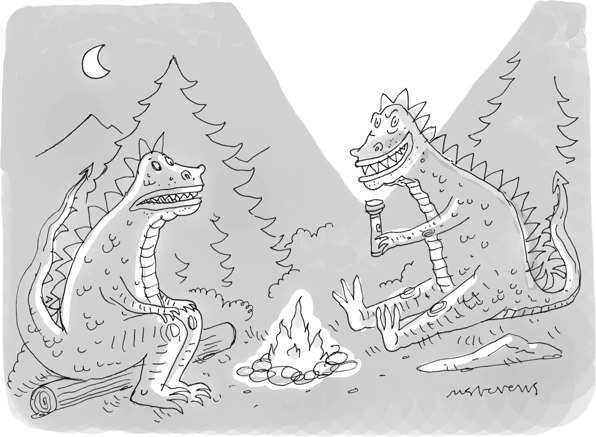

In [11]:
import requests
from PIL import Image

url = 'https://media.newyorker.com/cartoons/63dc6847be24a6a76d90eb99/master/w_1160,c_limit/230213_a26611_838.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')  
display(image.resize((596, 437)))

In [19]:
from transformers import AutoImageProcessor, BlipForConditionalGeneration
import torch

processor = AutoImageProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)


RuntimeError: Failed to import transformers.models.blip.image_processing_blip because of the following error (look up to see its traceback):
cannot import name 'OPENAI_CLIP_MEAN' from 'transformers.utils.constants' (c:\Users\harol\Anaconda3\lib\site-packages\transformers\utils\constants.py)

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 384, padding_idx=0)
    (position_embeddings): Embedding(512, 384)
    (token_type_embeddings): Embedding(2, 384)
    (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [1]:
!pip uninstall transformers


^C


In [17]:
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)


NameError: name 'processor' is not defined

In [20]:
from transformers import pipeline

classifier = pipeline(task="image-classification")
preds = classifier(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
cannot import name 'OPENAI_CLIP_MEAN' from 'transformers.utils.constants' (c:\Users\harol\Anaconda3\lib\site-packages\transformers\utils\constants.py)

In [3]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
